In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

In [2]:
def month_of_timestep(time):
    if (time < 0): return -1
    if (time < 744): return 0
    if (time < 1416): return 1
    if (time < 2160): return 2
    if (time < 2880): return 3
    if (time < 3624): return 4
    if (time < 4344): return 5
    if (time < 5088): return 6
    if (time < 5832): return 7
    if (time < 6552): return 8
    if (time < 7296): return 9
    if (time < 8016): return 10
    if (time < 8760): return 11
    return -1

In [3]:
def get_monthly_spatial_irradiance(filename): 
    df_lifetime = pd.read_excel(filename, sheet_name="Lifetime Hourly Data")
    df_spatial = pd.read_excel(filename, sheet_name="Subarray 1 spatial irradiance i")

    full_sun = [0] * 12
    spatial_array = []
    for i in range(0, 12):
        spatial_array.append([0] * 10)

    ghi = df_lifetime["Irradiance GHI from weather file | (W/m2)"].values
    for i in range(1, 8761):
        full_sun[month_of_timestep(i)] += ghi[i]
        for j in range(1, 11):
            spatial_array[month_of_timestep(i)][j-1] += df_spatial[j].values[i]
    
    for i in range(0,12):
        for j in range(0,10):
            spatial_array[i][j] /= float(full_sun[i])

    print(spatial_array)

    return spatial_array, df_spatial

In [4]:
spatial_21, dfs_21 = get_monthly_spatial_irradiance("ground_irradiance_21_ft.xlsx")
spatial_31, dfs_31 = get_monthly_spatial_irradiance("ground_irradiance_31_ft.xlsx")

[[0.15707537323752546, 0.4526412419711288, 0.6531430969151036, 0.7327239395427577, 0.7626323976116939, 0.7242068459619782, 0.7003370488646495, 0.6119087818085478, 0.39294725280122017, 0.12182038888817083], [0.14541033473955467, 0.46034731858186384, 0.6412149287710807, 0.7146942401729033, 0.7667789652843441, 0.7614086344413387, 0.7379760008936085, 0.6147640138613248, 0.41242707910514464, 0.14573504717422256], [0.12006829613673434, 0.419527045611633, 0.644914827102584, 0.7569825283353129, 0.7715138749421214, 0.7852389145008356, 0.7259589758352961, 0.6404124725706117, 0.4060594498017029, 0.11684630498795462], [0.12873097887174448, 0.4275506169986926, 0.6525197736952663, 0.7488949260455189, 0.7948480583736497, 0.7979508231751605, 0.7453675958145718, 0.653308477720919, 0.42398705363068573, 0.13025163053485436], [0.11674412618920701, 0.42171125375671725, 0.6718852150729736, 0.7743580071460479, 0.8248077848357803, 0.8179637252757811, 0.8002597629846278, 0.692035522549909, 0.438896542777834, 0

0.3917050691244238   9.608294930875577
1.8454258675078865   8.154574132492113


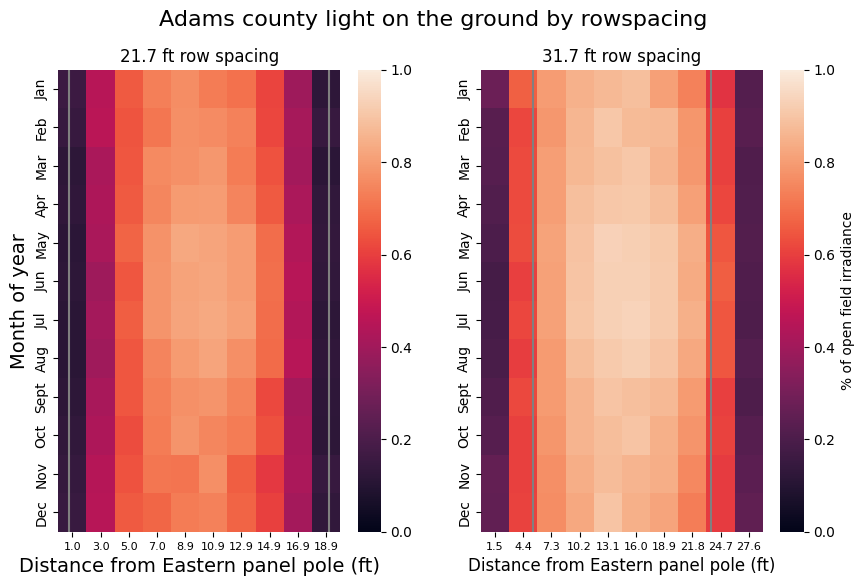

In [7]:
plt.rcParams['figure.figsize'] = (10, 6)
fig,axs = plt.subplots(1, 2)

ax = sns.heatmap(spatial_21,
                vmin=0.0,
                vmax=1.0,
                ax=axs[0])

xtics = [x / 2.0 for x in range(1,20,2)]
xlabels = np.round(dfs_21.iloc[0].values[2:] * 3.28084, 1)

ylabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ytics = [y / 2.0 for y in range(1,25,2)]

plt.suptitle('Adams county light on the ground by row spacing', fontsize = 16)

axs[0].set_xlabel('Distance from Eastern panel pole (ft)', fontsize = 14)
axs[0].set_ylabel('Month of year', fontsize = 14)

axs[0].set_xticks(ticks=xtics, labels=xlabels, fontsize = 8)
axs[0].set_yticks(ticks=ytics, labels=ylabels, fontsize = 10)
axs[0].set_title("21.7 ft row spacing")

eqp_left = (21.7 / 2.0 - 20 / 2.0) * 10.0 / 21.7
eqp_right = (21.7 / 2.0 + 20 / 2.0) * 10.0 / 21.7
print(eqp_left, " ", eqp_right)
ax.vlines(eqp_left, 0, 12, label="Equipment Bounds - Left", colors="grey")
ax.vlines(eqp_right, 0, 12, label="Equipment Bounds - Right", colors="grey")

ax = sns.heatmap(spatial_31,
                vmin=0.0,
                vmax=1.0,
                ax=axs[1],
                cbar_kws={'label': '% of open field irradiance'},)

xlabels = np.round(dfs_31.iloc[0].values[2:] * 3.28084, 1)

plt.suptitle('Adams county light on the ground by rowspacing', fontsize = 16)

axs[1].set_xlabel('Distance from Eastern panel pole (ft)', fontsize = 12)


axs[1].set_xticks(ticks=xtics, labels=xlabels, fontsize = 8)
axs[1].set_yticks(ticks=ytics, labels=ylabels, fontsize = 10)
axs[1].set_title("31.7 ft row spacing")

eqp_left = (31.7 / 2.0 - 20 / 2.0) * 10.0 / 31.7
eqp_right = (31.7 / 2.0 + 20 / 2.0) * 10.0 / 31.7
print(eqp_left, " ", eqp_right)
ax.vlines(eqp_left, 0, 12, label="Equipment Bounds - Left", colors="grey")
ax.vlines(eqp_right, 0, 12, label="Equipment Bounds - Right", colors="grey")

plt.savefig("irradiance_calcs_31.7.png")

In [ ]:
print(df_spatial.iloc[0].values[2:])

[0.       0.442591 1.32777  2.21295  3.09814  3.98332  4.8685   5.75368
 6.63886  7.52404  8.40922 ]
